In [1]:
import pathlib as pl
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt





In [8]:
# file reference for dataframe
json_file_path = pl.Path(os.path.abspath('')).parent.resolve() / "data_files/words/included_words.json"

with open(json_file_path) as json_file:
    json_dict = json.load(json_file)
# creating dataframe
df_json = pd.DataFrame.from_dict({(word): json_dict[word]
                           for word in json_dict.keys()},
                       orient='index')
                       

In [34]:
# creating dataframe
df_json = pd.DataFrame.from_dict({(word): json_dict[word]
                           for word in json_dict.keys()},
                       orient='index')


In [35]:
# filtering for fake and reliable and replacing NaN with [0,0]
df = df_json.copy()
df = df.filter(items=['fake', 'reliable'], axis=1)
df.rename(columns={'reliable':'real'})
df = df.applymap(lambda x: [0,0] if x is np.nan else x)


In [36]:
df

,fake,reliable
awaken,"[1, 2]","[0, 0]"
of,"[149, 2965]","[3, 26]"
12,"[11, 18]","[0, 0]"
strand,"[1, 5]","[0, 0]"
dna,"[3, 6]","[1, 2]"
...,...,...
cheapest,"[0, 0]","[0, 0]"
healthcarederek,"[0, 0]","[0, 0]"
selfdirect,"[0, 0]","[0, 0]"
oneinamillion,"[0, 0]","[0, 0]"


In [ ]:
# df['fake_art_freq'], df['fake_word_freq'] = zip(*df.fake)
# df['real_art_freq'], df['real_word_freq'] = zip(*df.real)

#df["freq"] = round(df.iloc[:,0:9].sum(axis=1))
#df["freq_binary"] = df.fake + df.reliable
#df["ratio_binary"] = round(df.fake/df.reliable,4)
#df["score_binary"] = df.fake - df.reliable
#df = df.sort_values(by='freq_binary', ascending=False)
#df = df.sort_values(by='score_binary', ascending=False)

#print(f"Count of tokens when looking at all article types:          {len(df)}")
#df = df[df.freq_binary != 0]
#print(f"Count of tokens when looking only at 'fake' and 'reliable': {len(df)}")

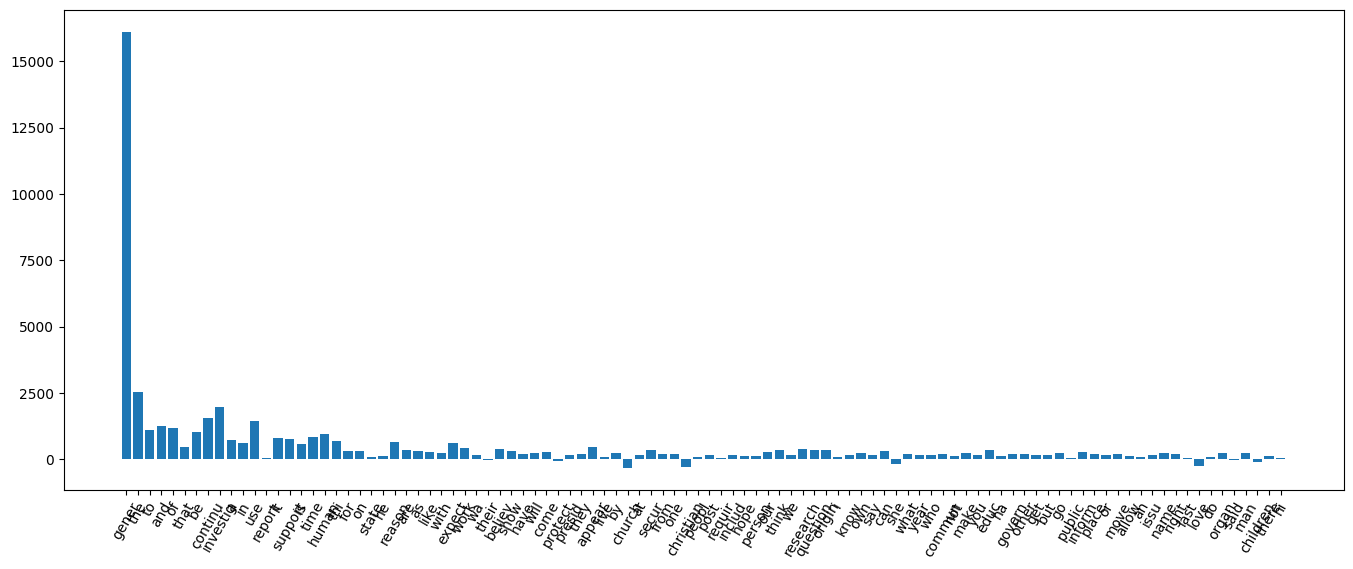

In [7]:
amount = 100
start = 0
end = start + amount
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
word = df.axes[0][start:end]
score = df.score_binary[start:end]
freq = df.freq_binary[start:end]
axes.bar(word, score)
plt.xticks(rotation=60)
plt.show()